In [9]:
%%capture
!pip3 install -U ../

In [1]:
%reload_ext autoreload
%autoreload 2
import time
import pickle
import os
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt
from bpe_surgery import bpe
from bpe_surgery.evaluate import Evaluate

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
from bpe_surgery import utils
import random 
random.seed(42)

gold_tokens = utils.get_gold_segmentations(dataset="/home/zaid/camelTB")
full_corpus = list(gold_tokens)
random.shuffle(full_corpus)

train_split_size = int(0.8 * len(full_corpus))
train_corpus = " ".join(full_corpus[:train_split_size])
test_corpus = " ".join(full_corpus[train_split_size:])
test_gold_tokens = {word:gold_tokens[word] for word in test_corpus.split(" ")}
print('train size', len(train_corpus.split(" ")))
print('test size',len(test_corpus.split(" ")))

train size 11457
test size 2865


In [3]:
train_corpus[:100]

'الودائع والمحن يسرقوا فتمهل يوجه يغيروا أرحل حمل الدلال أحق التطفل بالتواجد المثل بالغرب فهما فيخرجو'

In [4]:
gold_tokens['بالغرب']

['ب', 'الغرب']

In [5]:
def get_tokenizer(name, vocab_size):
    if name == 'bpe':
        return bpe(vocab_size)
    elif name == 'mat-bpe':
        return bpe(vocab_size, morph = True)
    elif name == 'seg-bpe':
        return bpe(vocab_size, seg=True)
    else:
        raise('Unrecognized tokenizer name!')

In [6]:
!rm -rf new_ckpts

In [7]:
evaluate_names = ["Segmentation", "Compression factor", "Training speed", "Inference speed",
                                   "Number of tokens", "Token length"]
vocab_sizes = [250, 500, 1_000, 5_000, 1_0000]

In [8]:
results = {}
ckpts_dir = 'new_ckpts'
os.makedirs(ckpts_dir, exist_ok = True)
for vocab_size in vocab_sizes:
    results_per_vocab = {}
    tok_names = ['bpe', 'mat-bpe', 'seg-bpe']
    for tok_name in tok_names:
        tokenizer = get_tokenizer(tok_name, vocab_size)
        print("*" * 30)
        tokenizer_dir = f'{tokenizer.name}-{vocab_size}'

        if tokenizer_dir in os.listdir(ckpts_dir):
            print(f"{tokenizer_dir} already trained ...")
            continue 
        tokenizer_index = vocab_sizes.index(vocab_size)
        if tokenizer_index > 0:
            prev_tokenizer_vocab_size = vocab_sizes[tokenizer_index - 1]
            prev_tokenizer_name = f"{tokenizer.name}-{prev_tokenizer_vocab_size}"
            try:
                tokenizer.load(f"{ckpts_dir}/{prev_tokenizer_name}")
            except:
                print("error in loading prev tokenizer ", prev_tokenizer_name)
        print(f"training {tokenizer_dir}")
        start_time = time.time()
        tokenizer.train(text = train_corpus)
        end_time = time.time()
        print('evaluating ... ')
        evaluate = Evaluate(test_corpus, test_gold_tokens, tokenizer)
        r1 = evaluate.evaluate_on_segmentation()
        r2 = evaluate.evaluate_on_compression_factor()
        r3 = end_time - start_time
        r4 = evaluate.evaluate_on_inf_speed()
        r5 = evaluate.evaluate_on_num_tokens()
        r6 = evaluate.evaluate_on_token_length()

        results_per_vocab[tokenizer_dir] = [{"segmentation": r1}, {"compression factor":r2}, {"training speed":r3}, {"inference speed":r4},
                                   {"num of tokens":r5}, {"token length":r6}]
        tokenizer.save(f'{ckpts_dir}/{tokenizer_dir}/')
        with open(f"{ckpts_dir}/{tokenizer_dir}/results.pl", 'wb') as handle:
            pickle.dump(results_per_vocab, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
    results[vocab_size] = results_per_vocab

******************************
training BPE-250


100%|██████████| 142/142 [00:10<00:00, 13.52it/s]


vocab size reached
evaluating ... 


100%|██████████| 250/250 [00:00<00:00, 494844.74it/s]


perform system check...
check java version...
Your java version is 11.0 which is compatiple with Farasa 
check toolkit binaries...
Dependencies seem to be satisfied..
task [SEGMENT] is initialized in STANDALONE mode...
******************************
training MaT-BPE-250
extracting affixes automatically ...


100%|██████████| 122/122 [00:08<00:00, 14.41it/s]


vocab size reached
evaluating ... 


100%|██████████| 250/250 [00:00<00:00, 531732.25it/s]


perform system check...
check java version...
Your java version is 11.0 which is compatiple with Farasa 
check toolkit binaries...
Dependencies seem to be satisfied..
task [SEGMENT] is initialized in STANDALONE mode...
******************************
training Seg-BPE-250
apply pre segmentation ...


100%|██████████| 149/149 [00:06<00:00, 23.75it/s]


vocab size reached
evaluating ... 


100%|██████████| 250/250 [00:00<00:00, 1372481.68it/s]


******************************
training BPE-500
Continue pretraining from vocab_size :  250


100%|██████████| 250/250 [00:12<00:00, 19.90it/s]


vocab size reached
evaluating ... 


100%|██████████| 500/500 [00:00<00:00, 1444319.56it/s]


perform system check...
check java version...
Your java version is 11.0 which is compatiple with Farasa 
check toolkit binaries...
Dependencies seem to be satisfied..
task [SEGMENT] is initialized in STANDALONE mode...
******************************
training MaT-BPE-500
Continue pretraining from vocab_size :  250


100%|██████████| 250/250 [00:11<00:00, 21.10it/s]


vocab size reached
evaluating ... 


100%|██████████| 500/500 [00:00<00:00, 1410324.14it/s]


perform system check...
check java version...
Your java version is 11.0 which is compatiple with Farasa 
check toolkit binaries...
Dependencies seem to be satisfied..
task [SEGMENT] is initialized in STANDALONE mode...
******************************
training Seg-BPE-500
apply pre segmentation ...
Continue pretraining from vocab_size :  250


100%|██████████| 250/250 [00:10<00:00, 24.34it/s]


vocab size reached
evaluating ... 


100%|██████████| 500/500 [00:00<00:00, 621746.81it/s]


******************************
training BPE-1000
Continue pretraining from vocab_size :  500


100%|██████████| 500/500 [00:24<00:00, 20.82it/s]


vocab size reached
evaluating ... 


100%|██████████| 1000/1000 [00:00<00:00, 1344328.21it/s]


perform system check...
check java version...
Your java version is 11.0 which is compatiple with Farasa 
check toolkit binaries...
Dependencies seem to be satisfied..
task [SEGMENT] is initialized in STANDALONE mode...
******************************
training MaT-BPE-1000
Continue pretraining from vocab_size :  500


100%|██████████| 500/500 [00:23<00:00, 20.93it/s]


vocab size reached
evaluating ... 


100%|██████████| 1000/1000 [00:00<00:00, 1679737.28it/s]


perform system check...
check java version...
Your java version is 11.0 which is compatiple with Farasa 
check toolkit binaries...
Dependencies seem to be satisfied..
task [SEGMENT] is initialized in STANDALONE mode...
******************************
training Seg-BPE-1000
apply pre segmentation ...
Continue pretraining from vocab_size :  500


100%|██████████| 500/500 [00:18<00:00, 27.10it/s]


vocab size reached
evaluating ... 


100%|██████████| 1000/1000 [00:00<00:00, 1394846.69it/s]


******************************
training BPE-5000
Continue pretraining from vocab_size :  1000


100%|██████████| 4000/4000 [03:27<00:00, 19.26it/s]


vocab size reached
evaluating ... 


100%|██████████| 5000/5000 [00:00<00:00, 1598195.40it/s]


perform system check...
check java version...
Your java version is 11.0 which is compatiple with Farasa 
check toolkit binaries...
Dependencies seem to be satisfied..
task [SEGMENT] is initialized in STANDALONE mode...
******************************
training MaT-BPE-5000
Continue pretraining from vocab_size :  1000


100%|██████████| 4000/4000 [03:22<00:00, 19.76it/s]


vocab size reached
evaluating ... 


100%|██████████| 5000/5000 [00:00<00:00, 1755232.67it/s]


perform system check...
check java version...
Your java version is 11.0 which is compatiple with Farasa 
check toolkit binaries...
Dependencies seem to be satisfied..
task [SEGMENT] is initialized in STANDALONE mode...
******************************
training Seg-BPE-5000
apply pre segmentation ...
Continue pretraining from vocab_size :  1000


100%|██████████| 4000/4000 [02:20<00:00, 28.43it/s]


vocab size reached
evaluating ... 


100%|██████████| 5000/5000 [00:00<00:00, 1607259.35it/s]


******************************
training BPE-10000
Continue pretraining from vocab_size :  5000


100%|██████████| 5000/5000 [04:30<00:00, 18.47it/s]


vocab size reached
evaluating ... 


100%|██████████| 10000/10000 [00:00<00:00, 1729467.26it/s]


perform system check...
check java version...
Your java version is 11.0 which is compatiple with Farasa 
check toolkit binaries...
Dependencies seem to be satisfied..
task [SEGMENT] is initialized in STANDALONE mode...
******************************
training MaT-BPE-10000
Continue pretraining from vocab_size :  5000


100%|██████████| 5000/5000 [04:31<00:00, 18.42it/s]


vocab size reached
evaluating ... 


100%|██████████| 10000/10000 [00:00<00:00, 1479315.77it/s]


perform system check...
check java version...
Your java version is 11.0 which is compatiple with Farasa 
check toolkit binaries...
Dependencies seem to be satisfied..
task [SEGMENT] is initialized in STANDALONE mode...
******************************
training Seg-BPE-10000
apply pre segmentation ...
Continue pretraining from vocab_size :  5000


100%|██████████| 5000/5000 [02:43<00:00, 30.50it/s]


vocab size reached
evaluating ... 


100%|██████████| 10000/10000 [00:00<00:00, 1562997.58it/s]


In [32]:
!rm -rf figures

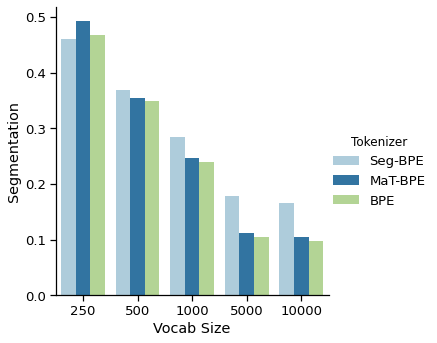

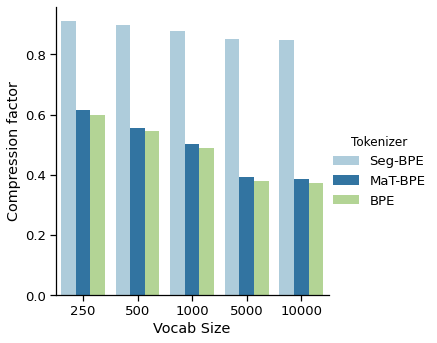

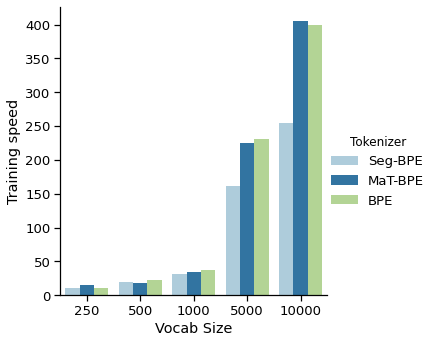

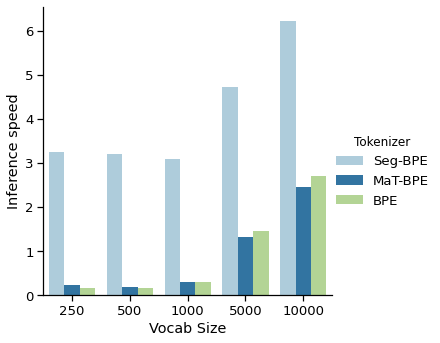

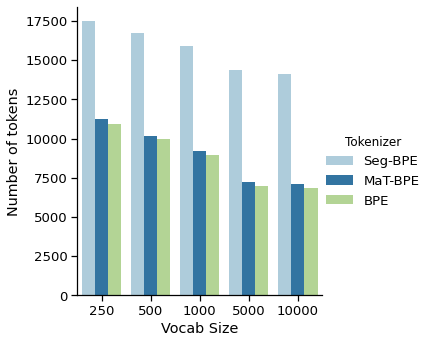

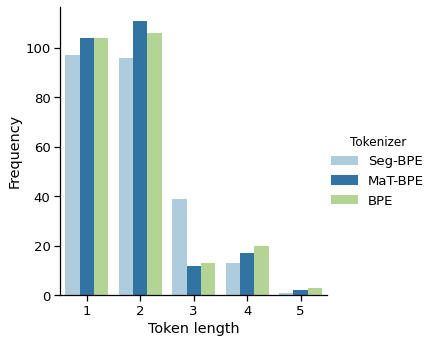

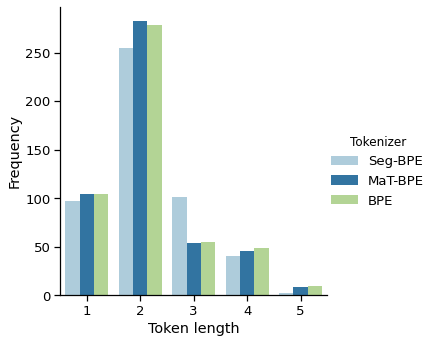

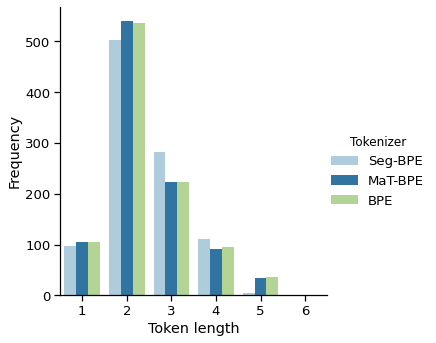

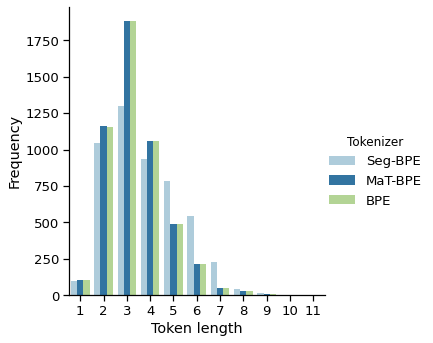

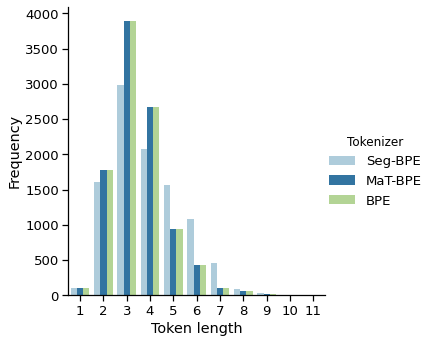

In [14]:
foulders = os.listdir(ckpts_dir)
fig_dir = 'new_figures'
os.makedirs(fig_dir, exist_ok=True)
for i, evaluate_name in enumerate(evaluate_names):
    names = []
    values = [] 
    vocabs = []
    palette = sns.color_palette("Paired", 3)

    sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.5})
    for vocab_size in vocab_sizes:
        for tokenizer_name in foulders: 
            if str(vocab_size) in tokenizer_name.split('-'):
                with open(f'{ckpts_dir}/{tokenizer_name}/results.pl', 'rb') as handle:
                    results_per_vocab = pickle.load(handle)
                names.append(tokenizer_name.replace(f'-{vocab_size}', '').replace('-ar', ''))
                values.append(list(results_per_vocab[tokenizer_name][i].values())[0])
                vocabs.append(vocab_size)

    x = 'Tokenizer'
    y = 'Value'
    z = 'Vocab Size'
    data = pd.DataFrame({x:names, y:values, z:vocabs})
    if i < 5 :
        sns.catplot(x=z, y=y, hue=x, data=data, kind='bar',palette=palette, hue_order=['Seg-BPE','MaT-BPE','BPE'])
        plt.ylabel(evaluate_name)
        plt.savefig(f"{fig_dir}/{evaluate_name.lower().replace(' ','_')}.png")
        plt.show()
    else:
        expanded_df = data.explode(y, ignore_index = True)
        for vocab_size in vocab_sizes:
            df = expanded_df[expanded_df[z] == vocab_size].groupby([x, y]).count().reset_index()
            sns.catplot(x=y, y=z, hue=x, data=df, kind='bar', palette=palette, hue_order=['Seg-BPE','MaT-BPE','BPE'])
            plt.xlabel('Token length')
            plt.ylabel(f'Frequency')
            plt.savefig(f"{fig_dir}/{f'{evaluate_name} for vocab {vocab_size}'.lower().replace(' ','_')}.png")
            plt.show()

In [2]:
from bpe_surgery import bpe 
tokenizer = bpe(vocab_size=250, seg = True)
tokenizer.load('ckpts/Seg-BPE-250')

perform system check...
check java version...
Your java version is 11.0 which is compatiple with Farasa 
check toolkit binaries...
Dependencies seem to be satisfied..
task [SEGMENT] is initialized in STANDALONE mode...


[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


In [3]:
tokenizer.vocab

['<pad>',
 '<unk>',
 '▁',
 '<s>',
 '</s>',
 'e',
 '0',
 'N',
 '!',
 '9',
 'm',
 '؟',
 'ب',
 'w',
 ')',
 'l',
 '-',
 'ة',
 'ئ',
 'ؤ',
 'n',
 'b',
 'س',
 '7',
 'k',
 'h',
 'ز',
 '–',
 'و',
 'أ',
 'O',
 'ص',
 'م',
 'ظ',
 'v',
 '1',
 '&',
 '6',
 'B',
 '}',
 'ه',
 '2',
 'i',
 '5',
 'د',
 'R',
 'ش',
 'ى',
 'I',
 'g',
 's',
 'H',
 'ط',
 'ل',
 'ق',
 '3',
 '—',
 'ر',
 'ء',
 'ك',
 'y',
 ',',
 'o',
 'f',
 '4',
 'a',
 '(',
 '.',
 'آ',
 '،',
 'L',
 'S',
 'c',
 'D',
 'd',
 '{',
 '؛',
 '+',
 'ض',
 'غ',
 '/',
 '*',
 'ف',
 'ن',
 'p',
 'ذ',
 'ي',
 'ح',
 '%',
 'ث',
 'إ',
 ':',
 'ج',
 '»',
 'خ',
 '8',
 'ا',
 'ع',
 'ت',
 'u',
 'r',
 'ل+',
 'ال+',
 '▁ال+',
 '▁و',
 '▁و+',
 '+ة',
 '▁ت',
 '▁ي',
 'ب+',
 '▁م',
 '+ا',
 '▁و+ال+',
 '▁أ',
 '▁ال+م',
 '▁ب+',
 '▁ف',
 '+ت',
 'وا',
 'ان',
 'ين',
 'ار',
 'ي+ة',
 '+ات',
 '▁ف+',
 'ال',
 'نا',
 'ام',
 'ون',
 '▁ل+',
 'ست',
 '▁ب+ال+',
 'را',
 '▁س',
 'ري',
 '▁ال+أ',
 '▁ن',
 '+ين',
 'ير',
 'اد',
 'اء',
 '▁ال+ت',
 'اب',
 '▁ك',
 '▁و+ت',
 'ات',
 '▁ع',
 'لي',
 'ر+ة',
 '▁ح',
 '▁ال+ع'

In [4]:
from farasa.segmenter import FarasaSegmenter

segmenter = FarasaSegmenter()

perform system check...
check java version...
Your java version is 11.0 which is compatiple with Farasa 
check toolkit binaries...
Dependencies seem to be satisfied..
task [SEGMENT] is initialized in STANDALONE mode...


In [6]:
segmenter.segment("السلام عليكم").replace("+", " +")

'ال +سلام علي +كم'